<a href="https://colab.research.google.com/github/AishwaryaKaranth/final-year-project/blob/master/All%20Models/Model_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -o '/content/drive/MyDrive/he1 (1).zip'

# Libraries

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.callbacks import EarlyStopping
from keras.layers import Input
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.optimizers import RMSprop,Adam,schedules
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Model architecture

In [ ]:
def ConvLayers(layers, model, filters):
    for i in range(layers):
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3,3,activation='relu'))
    model.add(MaxPooling2D((2,2),strides=(1,1),padding="same"))

In [ ]:
def FCLayers(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

In [ ]:
def VGG16_arc():
    model=Sequential()
    ConvLayers(2,model,64)
    ConvLayers(2,model,128)
    ConvLayers(3,model,256)
    ConvLayers(3,model,512)
    ConvLayers(3,model,512)
    model.add(Flatten())
    FCLayers(model)
    FCLayers(model)
    model.add(Dense(37,activation='sigmoid'))
    #model.add(Dense(3,activation='softmax'))
    return model

In [ ]:
#Model compilation
# optimizer = RMSprop(lr=1e-4)
# scheduler=schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_rate=4e-3,decay_steps=1000)
optimizer=Adam(learning_rate=3e-4,decay=1e-4)
model = VGG16_arc()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) 

In [ ]:
shuf=pd.read_csv('/content/drive/MyDrive/shuffled.csv')
shuf.head()
cols=shuf.columns[1:]

In [ ]:
shuf['GalaxyID']=shuf['GalaxyID']+'.jpg'
shuf['GalaxyID'].head()

0    821834resized2rotated_md_he.jpg
1    218133resized2rotated_md_he.jpg
2    183671resized1rotated_md_he.jpg
3    953008resized4rotated_md_he.jpg
4    327819resized2rotated_md_he.jpg
Name: GalaxyID, dtype: object

In [ ]:
f=cols.values.tolist()

# Generator Function

In [ ]:
gen=ImageDataGenerator(validation_split=0.2)
train_gen=gen.flow_from_dataframe(directory='/content/he1',
                                  target_size=(224,224),
                                  dataframe=shuf,
                                  x_col='GalaxyID',
                                  y_col=f,
                                  subset='training',
                                  batch_size=64,
                                  seed=42,
                                  class_mode='raw',
                                  shuffle=True)

valid_gen=gen.flow_from_dataframe(directory='/content/he1',
                                  target_size=(224,224),
                                  dataframe=shuf,
                                  x_col='GalaxyID',
                                  y_col=f,
                                  subset='validation',
                                  batch_size=64,
                                  seed=42,
                                  class_mode='raw',
                                  shuffle=True)


Found 197050 validated image filenames.
Found 49262 validated image filenames.


In [ ]:
batch_size=64
steps=train_gen.n//batch_size
val_steps=valid_gen.n//batch_size

In [ ]:
checkpoint_filepath = 'end_12he.hdf5'
cp_callback =keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq='epoch',
    save_best_only=True)

# model.fit(train_gen,epochs=10,verbose=1,steps_per_epoch=steps,validation_data=valid_gen,validation_steps=val_steps)
model.fit(train_gen,epochs=10,verbose=1,batch_size=None,steps_per_epoch=steps,callbacks=[cp_callback],validation_data=valid_gen,validation_steps=val_steps)

Epoch 1/10
3078/3078 [==============================] - 392s 127ms/step - loss: 0.0282 - accuracy: 0.6040 - val_loss: 0.0162 - val_accuracy: 0.6805
Epoch 2/10
3078/3078 [==============================] - 395s 128ms/step - loss: 0.0159 - accuracy: 0.6737 - val_loss: 0.0146 - val_accuracy: 0.6963
Epoch 3/10
3078/3078 [==============================] - 392s 127ms/step - loss: 0.0146 - accuracy: 0.6930 - val_loss: 0.0132 - val_accuracy: 0.7277
Epoch 4/10
3078/3078 [==============================] - 380s 123ms/step - loss: 0.0129 - accuracy: 0.7289 - val_loss: 0.0131 - val_accuracy: 0.7331
Epoch 5/10
3078/3078 [==============================] - 381s 124ms/step - loss: 0.0120 - accuracy: 0.7431 - val_loss: 0.0121 - val_accuracy: 0.7447
Epoch 6/10
3078/3078 [==============================] - 391s 127ms/step - loss: 0.0114 - accuracy: 0.7528 - val_loss: 0.0115 - val_accuracy: 0.7500
Epoch 7/10
3078/3078 [==============================] - 386s 126ms/step - loss: 0.0110 - accuracy: 0.7585 - val_

In [ ]:
model.save('final_best.hdf5')

In [ ]:
key=model.history.history.keys()
values=model.history.history

In [ ]:
key

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

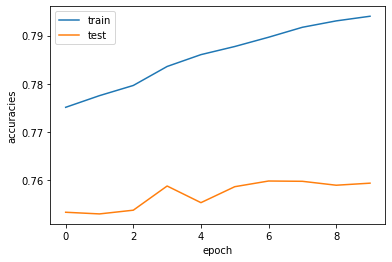

In [ ]:
plt.plot(values['accuracy'])
plt.plot(values['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.legend(['train', 'test'], loc='upper left')

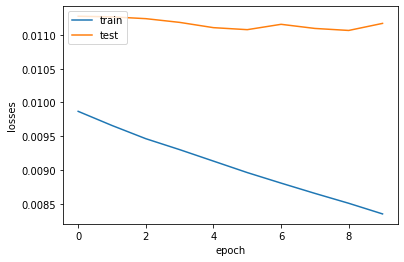

In [ ]:
plt.plot(values['loss'])
plt.plot(values['val_loss'])
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
import keras.backend as K
K.eval(model.optimizer.decay)

1e-04

In [ ]:
K.eval(model.optimizer.lr)

0.0003

In [ ]:
K.eval(model.optimizer)

# Loading saved model


In [ ]:
model.build(input_shape=(None,224,224,3))

In [ ]:
model.evaluate(valid_gen)

770/770 [==============================] - 76s 99ms/step - loss: 0.0111 - accuracy: 0.7593


[0.011129741556942463, 0.7592667937278748]